# SKIN LESION ANALYSER

Skin cancer is the most common form of cancer, globally accounting for at least 40% of cases. Skin cancer is diagnosed visually, beginning with an initial clinical screening and followed potentially by dermoscopic analysis, a biopsy and histopathological examination. Automated classification of skin lesions using images is a challenging task owing to the fine-grained variability in the appearance of skin lesions.

The HAM10000 dataset consists of 10015 dermatoscopic images which are released as a training set for academic machine learning purposes and are publicly available through the ISIC archive. This benchmark dataset can be used for machine learning and for comparisons with human experts.

It has 7 different classes of skin cancer which are listed below :

1. Melanocytic nevi
2. Melanoma
3. Benign keratosis-like lesions
4. Basal cell carcinoma
5. Actinic keratoses
6. Vascular lesions
7. Dermatofibroma



In this kernel 7 different classes of skin cancer will be classified using MobileNet Network with keras tensorflow in backend with Exploratory Data Analysis. The steps followed for model building and evaluation can be structured as follows :

Step 1: Importing Essential Libraries <br>
Step 2: Reading and Processing Data <br>
Step 3: Data Cleaning <br>
Step 4: Exploratory data analysis (EDA) <br>
Step 5: Train Validation Split <br>
Step 6: Image Augmentation <br>
Step 7: Model Building (MobileNet) <br>
Step 8: Training the model <br>
Step 9: Model Evaluation <br>

# Step 1: Importing Essential Libraries


In [69]:

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)


import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))



/kaggle/input/skin-cancer-mnist-ham10000/hmnist_28_28_L.csv
/kaggle/input/skin-cancer-mnist-ham10000/HAM10000_metadata.csv
/kaggle/input/skin-cancer-mnist-ham10000/hmnist_8_8_RGB.csv
/kaggle/input/skin-cancer-mnist-ham10000/hmnist_28_28_RGB.csv
/kaggle/input/skin-cancer-mnist-ham10000/hmnist_8_8_L.csv
/kaggle/input/skin-cancer-mnist-ham10000/ham10000_images_part_1/ISIC_0027269.jpg
/kaggle/input/skin-cancer-mnist-ham10000/ham10000_images_part_1/ISIC_0025716.jpg
/kaggle/input/skin-cancer-mnist-ham10000/ham10000_images_part_1/ISIC_0024382.jpg
/kaggle/input/skin-cancer-mnist-ham10000/ham10000_images_part_1/ISIC_0024406.jpg
/kaggle/input/skin-cancer-mnist-ham10000/ham10000_images_part_1/ISIC_0028104.jpg
/kaggle/input/skin-cancer-mnist-ham10000/ham10000_images_part_1/ISIC_0025581.jpg
/kaggle/input/skin-cancer-mnist-ham10000/ham10000_images_part_1/ISIC_0027544.jpg
/kaggle/input/skin-cancer-mnist-ham10000/ham10000_images_part_1/ISIC_0025163.jpg
/kaggle/input/skin-cancer-mnist-ham10000/ham10000

/kaggle/input/skin-cancer-mnist-ham10000/ham10000_images_part_1/ISIC_0024955.jpg
/kaggle/input/skin-cancer-mnist-ham10000/ham10000_images_part_1/ISIC_0026840.jpg
/kaggle/input/skin-cancer-mnist-ham10000/ham10000_images_part_1/ISIC_0026605.jpg
/kaggle/input/skin-cancer-mnist-ham10000/ham10000_images_part_1/ISIC_0027295.jpg
/kaggle/input/skin-cancer-mnist-ham10000/ham10000_images_part_1/ISIC_0027549.jpg
/kaggle/input/skin-cancer-mnist-ham10000/ham10000_images_part_1/ISIC_0024528.jpg
/kaggle/input/skin-cancer-mnist-ham10000/ham10000_images_part_1/ISIC_0027046.jpg
/kaggle/input/skin-cancer-mnist-ham10000/ham10000_images_part_1/ISIC_0029168.jpg
/kaggle/input/skin-cancer-mnist-ham10000/ham10000_images_part_1/ISIC_0025567.jpg
/kaggle/input/skin-cancer-mnist-ham10000/ham10000_images_part_1/ISIC_0025672.jpg
/kaggle/input/skin-cancer-mnist-ham10000/ham10000_images_part_1/ISIC_0028659.jpg
/kaggle/input/skin-cancer-mnist-ham10000/ham10000_images_part_1/ISIC_0028739.jpg
/kaggle/input/skin-cancer-mn

/kaggle/input/skin-cancer-mnist-ham10000/ham10000_images_part_1/ISIC_0025169.jpg
/kaggle/input/skin-cancer-mnist-ham10000/ham10000_images_part_1/ISIC_0027075.jpg
/kaggle/input/skin-cancer-mnist-ham10000/ham10000_images_part_1/ISIC_0025846.jpg
/kaggle/input/skin-cancer-mnist-ham10000/ham10000_images_part_1/ISIC_0026671.jpg
/kaggle/input/skin-cancer-mnist-ham10000/ham10000_images_part_1/ISIC_0027826.jpg
/kaggle/input/skin-cancer-mnist-ham10000/ham10000_images_part_1/ISIC_0029021.jpg
/kaggle/input/skin-cancer-mnist-ham10000/ham10000_images_part_1/ISIC_0025713.jpg
/kaggle/input/skin-cancer-mnist-ham10000/ham10000_images_part_1/ISIC_0028298.jpg
/kaggle/input/skin-cancer-mnist-ham10000/ham10000_images_part_1/ISIC_0027437.jpg
/kaggle/input/skin-cancer-mnist-ham10000/ham10000_images_part_1/ISIC_0028286.jpg
/kaggle/input/skin-cancer-mnist-ham10000/ham10000_images_part_1/ISIC_0028558.jpg
/kaggle/input/skin-cancer-mnist-ham10000/ham10000_images_part_1/ISIC_0028984.jpg
/kaggle/input/skin-cancer-mn

/kaggle/input/skin-cancer-mnist-ham10000/ham10000_images_part_1/ISIC_0025683.jpg
/kaggle/input/skin-cancer-mnist-ham10000/ham10000_images_part_1/ISIC_0024564.jpg
/kaggle/input/skin-cancer-mnist-ham10000/ham10000_images_part_1/ISIC_0025148.jpg
/kaggle/input/skin-cancer-mnist-ham10000/ham10000_images_part_1/ISIC_0025987.jpg
/kaggle/input/skin-cancer-mnist-ham10000/ham10000_images_part_1/ISIC_0025615.jpg
/kaggle/input/skin-cancer-mnist-ham10000/ham10000_images_part_1/ISIC_0025446.jpg
/kaggle/input/skin-cancer-mnist-ham10000/ham10000_images_part_1/ISIC_0025641.jpg
/kaggle/input/skin-cancer-mnist-ham10000/ham10000_images_part_1/ISIC_0029158.jpg
/kaggle/input/skin-cancer-mnist-ham10000/ham10000_images_part_1/ISIC_0025416.jpg
/kaggle/input/skin-cancer-mnist-ham10000/ham10000_images_part_1/ISIC_0025946.jpg
/kaggle/input/skin-cancer-mnist-ham10000/ham10000_images_part_1/ISIC_0026716.jpg
/kaggle/input/skin-cancer-mnist-ham10000/ham10000_images_part_1/ISIC_0029289.jpg
/kaggle/input/skin-cancer-mn

/kaggle/input/skin-cancer-mnist-ham10000/ham10000_images_part_2/ISIC_0030044.jpg
/kaggle/input/skin-cancer-mnist-ham10000/ham10000_images_part_2/ISIC_0032994.jpg
/kaggle/input/skin-cancer-mnist-ham10000/ham10000_images_part_2/ISIC_0033773.jpg
/kaggle/input/skin-cancer-mnist-ham10000/ham10000_images_part_2/ISIC_0034231.jpg
/kaggle/input/skin-cancer-mnist-ham10000/ham10000_images_part_2/ISIC_0032483.jpg
/kaggle/input/skin-cancer-mnist-ham10000/ham10000_images_part_2/ISIC_0033907.jpg
/kaggle/input/skin-cancer-mnist-ham10000/ham10000_images_part_2/ISIC_0030213.jpg
/kaggle/input/skin-cancer-mnist-ham10000/ham10000_images_part_2/ISIC_0032613.jpg
/kaggle/input/skin-cancer-mnist-ham10000/ham10000_images_part_2/ISIC_0031561.jpg
/kaggle/input/skin-cancer-mnist-ham10000/ham10000_images_part_2/ISIC_0030876.jpg
/kaggle/input/skin-cancer-mnist-ham10000/ham10000_images_part_2/ISIC_0034222.jpg
/kaggle/input/skin-cancer-mnist-ham10000/ham10000_images_part_2/ISIC_0030293.jpg
/kaggle/input/skin-cancer-mn

/kaggle/input/skin-cancer-mnist-ham10000/ham10000_images_part_2/ISIC_0029772.jpg
/kaggle/input/skin-cancer-mnist-ham10000/ham10000_images_part_2/ISIC_0031565.jpg
/kaggle/input/skin-cancer-mnist-ham10000/ham10000_images_part_2/ISIC_0033920.jpg
/kaggle/input/skin-cancer-mnist-ham10000/ham10000_images_part_2/ISIC_0033041.jpg
/kaggle/input/skin-cancer-mnist-ham10000/ham10000_images_part_2/ISIC_0033448.jpg
/kaggle/input/skin-cancer-mnist-ham10000/ham10000_images_part_2/ISIC_0032357.jpg
/kaggle/input/skin-cancer-mnist-ham10000/ham10000_images_part_2/ISIC_0033827.jpg
/kaggle/input/skin-cancer-mnist-ham10000/ham10000_images_part_2/ISIC_0031915.jpg
/kaggle/input/skin-cancer-mnist-ham10000/ham10000_images_part_2/ISIC_0032274.jpg
/kaggle/input/skin-cancer-mnist-ham10000/ham10000_images_part_2/ISIC_0031542.jpg
/kaggle/input/skin-cancer-mnist-ham10000/ham10000_images_part_2/ISIC_0030138.jpg
/kaggle/input/skin-cancer-mnist-ham10000/ham10000_images_part_2/ISIC_0032749.jpg
/kaggle/input/skin-cancer-mn

/kaggle/input/skin-cancer-mnist-ham10000/ham10000_images_part_2/ISIC_0034003.jpg
/kaggle/input/skin-cancer-mnist-ham10000/ham10000_images_part_2/ISIC_0032744.jpg
/kaggle/input/skin-cancer-mnist-ham10000/ham10000_images_part_2/ISIC_0029338.jpg
/kaggle/input/skin-cancer-mnist-ham10000/ham10000_images_part_2/ISIC_0031832.jpg
/kaggle/input/skin-cancer-mnist-ham10000/ham10000_images_part_2/ISIC_0032267.jpg
/kaggle/input/skin-cancer-mnist-ham10000/ham10000_images_part_2/ISIC_0032238.jpg
/kaggle/input/skin-cancer-mnist-ham10000/ham10000_images_part_2/ISIC_0032053.jpg
/kaggle/input/skin-cancer-mnist-ham10000/ham10000_images_part_2/ISIC_0029445.jpg
/kaggle/input/skin-cancer-mnist-ham10000/ham10000_images_part_2/ISIC_0033802.jpg
/kaggle/input/skin-cancer-mnist-ham10000/ham10000_images_part_2/ISIC_0032689.jpg
/kaggle/input/skin-cancer-mnist-ham10000/ham10000_images_part_2/ISIC_0034151.jpg
/kaggle/input/skin-cancer-mnist-ham10000/ham10000_images_part_2/ISIC_0031229.jpg
/kaggle/input/skin-cancer-mn

In [70]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
from glob import glob
import seaborn as sns
from PIL import Image
np.random.seed(123)
from sklearn.preprocessing import label_binarize
from sklearn.metrics import confusion_matrix
import itertools


from numpy.random import seed
seed(101)


import pandas as pd
import numpy as np
import keras
from keras import backend as K

import tensorflow
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import categorical_crossentropy
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint

import os

from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
import itertools
import shutil
import matplotlib.pyplot as plt
%matplotlib inline


# Step 2: Reading & Processing Data

In [71]:
os.listdir('../input')

['skin-cancer-mnist-ham10000']

In [72]:
# Create a new directory
base_dir = 'base_dir'
os.mkdir(base_dir)


#[CREATE FOLDERS INSIDE THE BASE DIRECTORY]

# now we create 7 folders inside 'base_dir':

# train_dir
    # nv
    # mel
    # bkl
    # bcc
    # akiec
    # vasc
    # df
 #val_dir
    # nv
    # mel
    # bkl
    # bcc
    # akiec
    # vasc
    # df

# create a path to 'base_dir' to which we will join the names of the new folders
# train_dir
train_dir = os.path.join(base_dir, 'train_dir')
os.mkdir(train_dir)

# val_dir
val_dir = os.path.join(base_dir, 'val_dir')
os.mkdir(val_dir)


# [CREATE FOLDERS INSIDE THE TRAIN, VALIDATION AND TEST FOLDERS]
# Inside each folder we create seperate folders for each class

# create new folders inside train_dir
nv = os.path.join(train_dir, 'nv')
os.mkdir(nv)
mel = os.path.join(train_dir, 'mel')
os.mkdir(mel)
bkl = os.path.join(train_dir, 'bkl')
os.mkdir(bkl)
bcc = os.path.join(train_dir, 'bcc')
os.mkdir(bcc)
akiec = os.path.join(train_dir, 'akiec')
os.mkdir(akiec)
vasc = os.path.join(train_dir, 'vasc')
os.mkdir(vasc)
df = os.path.join(train_dir, 'df')
os.mkdir(df)



# create new folders inside val_dir
nv = os.path.join(val_dir, 'nv')
os.mkdir(nv)
mel = os.path.join(val_dir, 'mel')
os.mkdir(mel)
bkl = os.path.join(val_dir, 'bkl')
os.mkdir(bkl)
bcc = os.path.join(val_dir, 'bcc')
os.mkdir(bcc)
akiec = os.path.join(val_dir, 'akiec')
os.mkdir(akiec)
vasc = os.path.join(val_dir, 'vasc')
os.mkdir(vasc)
df = os.path.join(val_dir, 'df')
os.mkdir(df)


FileExistsError: [Errno 17] File exists: 'base_dir'

In [ ]:
!pwd

In [73]:
df = pd.read_csv('../input/skin-cancer-mnist-ham10000/HAM10000_metadata.csv')

base_skin_dir = os.path.join('..', 'input')

imageid_path_dict = {os.path.splitext(os.path.basename(x))[0]: x
                     for x in glob(os.path.join(base_skin_dir, '*', '*.jpg'))}

lesion_type_dict = {
    'nv': 'Melanocytic nevi',
    'mel': 'Melanoma',
    'bkl': 'Benign keratosis-like lesions ',
    'bcc': 'Basal cell carcinoma',
    'akiec': 'Actinic keratoses',
    'vasc': 'Vascular lesions',
    'df': 'Dermatofibroma'
}
# Creating New Columns for better readability

df['path'] = df['image_id'].map(imageid_path_dict.get)
df['cell_type'] = df['dx'].map(lesion_type_dict.get) 
df['cell_type_idx'] = pd.Categorical(df['cell_type']).codes

df.head()

,lesion_id,image_id,dx,dx_type,age,sex,localization,path,cell_type,cell_type_idx
0,HAM_0000118,ISIC_0027419,bkl,histo,80.0,male,scalp,None,Benign keratosis-like lesions,2
1,HAM_0000118,ISIC_0025030,bkl,histo,80.0,male,scalp,None,Benign keratosis-like lesions,2
2,HAM_0002730,ISIC_0026769,bkl,histo,80.0,male,scalp,None,Benign keratosis-like lesions,2
3,HAM_0002730,ISIC_0025661,bkl,histo,80.0,male,scalp,None,Benign keratosis-like lesions,2
4,HAM_0001466,ISIC_0031633,bkl,histo,75.0,male,ear,None,Benign keratosis-like lesions,2


In [74]:
df = df.drop(['path'], axis = 1) 

# Step 3: Data Cleaning

In [75]:
df.isnull().sum()

lesion_id         0
image_id          0
dx                0
dx_type           0
age              57
sex               0
localization      0
cell_type         0
cell_type_idx     0
dtype: int64

In [76]:
df['age'].fillna((df['age'].mean()), inplace=True)

In [77]:
df.isnull().sum()

lesion_id        0
image_id         0
dx               0
dx_type          0
age              0
sex              0
localization     0
cell_type        0
cell_type_idx    0
dtype: int64

# Step 4: Exploratory Data Analysis(EDA)

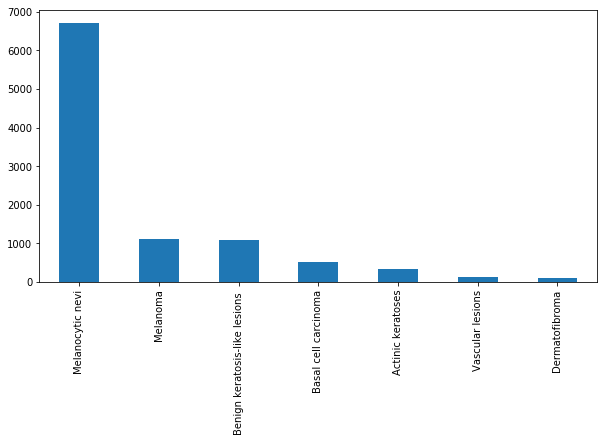

In [78]:
# Distribution of 7 classes
fig, ax1 = plt.subplots(1, 1, figsize= (10, 5))
df['cell_type'].value_counts().plot(kind='bar', ax=ax1)


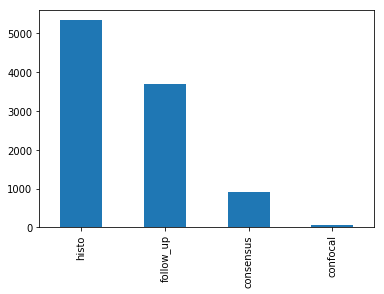

In [79]:
# Plotting of Technical Validation field (ground truth) which is dx_type to see the distribution of its 4 categories
# Histopathology,Confocal,Follow-up,Consensus

df['dx_type'].value_counts().plot(kind='bar')

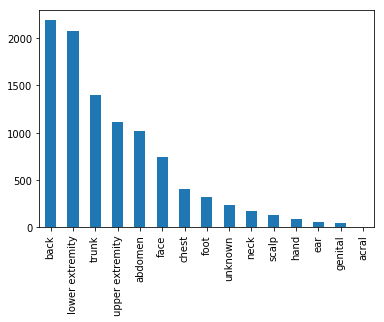

In [80]:
     

# Plotting the distribution of localization field

df['localization'].value_counts().plot(kind='bar')



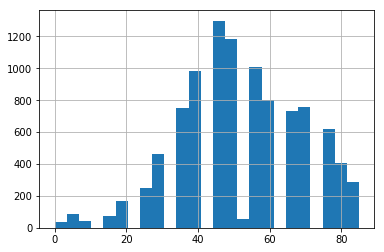

In [81]:
# Check the distribution of Age

df['age'].hist(bins=25)

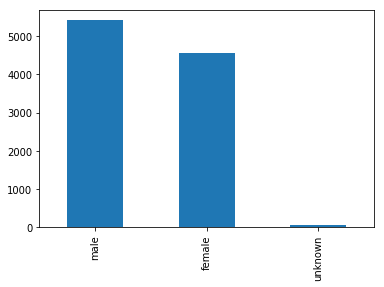

In [82]:


# Distribution of males and females

df['sex'].value_counts().plot(kind='bar')



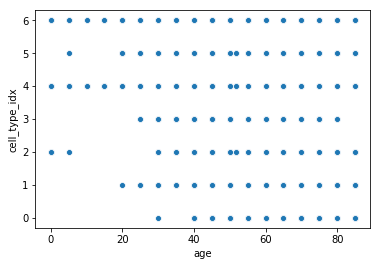

In [83]:
# Agewise distribution of skin cancer types

sns.scatterplot('age','cell_type_idx',data=df)

# Step 5: Train Validation Split

In [84]:
# this will tell us how many images are associated with each lesion_id
df_ = df.groupby('lesion_id').count()

# now we filter out lesion_id's that have only one image associated with it
df_ = df_[df_['image_id'] == 1]

df_.reset_index(inplace=True)

df_.head()

,lesion_id,image_id,dx,dx_type,age,sex,localization,cell_type,cell_type_idx
0,HAM_0000001,1,1,1,1,1,1,1,1
1,HAM_0000003,1,1,1,1,1,1,1,1
2,HAM_0000004,1,1,1,1,1,1,1,1
3,HAM_0000007,1,1,1,1,1,1,1,1
4,HAM_0000008,1,1,1,1,1,1,1,1


In [85]:
# here we identify lesion_id's that have duplicate images and those that have only
# one image.

def identify_duplicates(x):
    
    unique_list = list(df_['lesion_id'])
    
    if x in unique_list:
        return 'no_duplicates'
    else:
        return 'has_duplicates'
    
# create a new colum that is a copy of the lesion_id column
df['duplicates'] = df['lesion_id']
# apply the function to this new column
df['duplicates'] = df['duplicates'].apply(identify_duplicates)

df.head()

,lesion_id,image_id,dx,dx_type,age,sex,localization,cell_type,cell_type_idx,duplicates
0,HAM_0000118,ISIC_0027419,bkl,histo,80.0,male,scalp,Benign keratosis-like lesions,2,has_duplicates
1,HAM_0000118,ISIC_0025030,bkl,histo,80.0,male,scalp,Benign keratosis-like lesions,2,has_duplicates
2,HAM_0002730,ISIC_0026769,bkl,histo,80.0,male,scalp,Benign keratosis-like lesions,2,has_duplicates
3,HAM_0002730,ISIC_0025661,bkl,histo,80.0,male,scalp,Benign keratosis-like lesions,2,has_duplicates
4,HAM_0001466,ISIC_0031633,bkl,histo,75.0,male,ear,Benign keratosis-like lesions,2,has_duplicates


In [86]:
df['duplicates'].value_counts()

no_duplicates     5514
has_duplicates    4501
Name: duplicates, dtype: int64

In [87]:
# now we filter out images that don't have duplicates
df_ = df[df['duplicates'] == 'no_duplicates']

df_.shape


(5514, 10)

In [88]:
# now we create a val set using df because we are sure that none of these images
# have augmented duplicates in the train set
y = df_['dx']

_, df_val = train_test_split(df_, test_size=0.17, random_state=101, stratify=y)

df_val.shape


(938, 10)

In [89]:
df_val['dx'].value_counts()

nv       751
bkl       75
mel       39
bcc       30
akiec     26
vasc      11
df         6
Name: dx, dtype: int64

In [90]:
# This set will be df_data excluding all rows that are in the val set

# This function identifies if an image is part of the train
# or val set.
def identify_val_rows(x):
    # create a list of all the lesion_id's in the val set
    val_list = list(df_val['image_id'])
    
    if str(x) in val_list:
        return 'val'
    else:
        return 'train'

# identify train and val rows

# create a new colum that is a copy of the image_id column
df['train_or_val'] = df['image_id']
# apply the function to this new column
df['train_or_val'] = df['train_or_val'].apply(identify_val_rows)
   
# filter out train rows
df_train = df[df['train_or_val'] == 'train']


print(len(df_train))
print(len(df_val))

9077
938


In [91]:
df_train['dx'].value_counts()

nv       5954
mel      1074
bkl      1024
bcc       484
akiec     301
vasc      131
df        109
Name: dx, dtype: int64

In [92]:
df_val['dx'].value_counts()

nv       751
bkl       75
mel       39
bcc       30
akiec     26
vasc      11
df         6
Name: dx, dtype: int64

In [93]:


# Set the image_id as the index in df_data
df.set_index('image_id', inplace=True)



In [94]:
# Get a list of images in each of the two folders
folder_1 = os.listdir('../input/skin-cancer-mnist-ham10000/ham10000_images_part_1')
folder_2 = os.listdir('../input/skin-cancer-mnist-ham10000/ham10000_images_part_2')

# Get a list of train and val images
train_list = list(df_train['image_id'])
val_list = list(df_val['image_id'])



# Transfer the train images

for image in train_list:
    
    fname = image + '.jpg'
    label = df.loc[image,'dx']
    
    if fname in folder_1:
        # source path to image
        src = os.path.join('../input/skin-cancer-mnist-ham10000/ham10000_images_part_1', fname)
        # destination path to image
        dst = os.path.join(train_dir, label, fname)
        # copy the image from the source to the destination
        shutil.copyfile(src, dst)

    if fname in folder_2:
        # source path to image
        src = os.path.join('../input/skin-cancer-mnist-ham10000/ham10000_images_part_2', fname)
        # destination path to image
        dst = os.path.join(train_dir, label, fname)
        # copy the image from the source to the destination
        shutil.copyfile(src, dst)


# Transfer the val images

for image in val_list:
    
    fname = image + '.jpg'
    label = df.loc[image,'dx']
    
    if fname in folder_1:
        # source path to image
        src = os.path.join('../input/skin-cancer-mnist-ham10000/ham10000_images_part_1', fname)
        # destination path to image
        dst = os.path.join(val_dir, label, fname)
        # copy the image from the source to the destination
        shutil.copyfile(src, dst)

    if fname in folder_2:
        # source path to image
        src = os.path.join('../input/skin-cancer-mnist-ham10000/ham10000_images_part_2', fname)
        # destination path to image
        dst = os.path.join(val_dir, label, fname)
        # copy the image from the source to the destination
        shutil.copyfile(src, dst)
        


In [95]:
# check how many train images we have in each folder

print(len(os.listdir('base_dir/train_dir/nv')))
print(len(os.listdir('base_dir/train_dir/mel')))
print(len(os.listdir('base_dir/train_dir/bkl')))
print(len(os.listdir('base_dir/train_dir/bcc')))
print(len(os.listdir('base_dir/train_dir/akiec')))
print(len(os.listdir('base_dir/train_dir/vasc')))
print(len(os.listdir('base_dir/train_dir/df')))

5954
5920
5920
5858
5217
5290
4410


In [96]:
# check how many val images we have in each folder

print(len(os.listdir('base_dir/val_dir/nv')))
print(len(os.listdir('base_dir/val_dir/mel')))
print(len(os.listdir('base_dir/val_dir/bkl')))
print(len(os.listdir('base_dir/val_dir/bcc')))
print(len(os.listdir('base_dir/val_dir/akiec')))
print(len(os.listdir('base_dir/val_dir/vasc')))
print(len(os.listdir('base_dir/val_dir/df')))

751
39
75
30
26
11
6


# Step 6: Data Augmentation

In [97]:
# Copy the train images into aug_dir
# note that we are not augmenting class 'nv'
class_list = ['mel','bkl','bcc','akiec','vasc','df']

for item in class_list:
    
    # We are creating temporary directories here because we delete these directories later
    # create a base dir
    aug_dir = 'aug_dir'
    os.mkdir(aug_dir)
    # create a dir within the base dir to store images of the same class
    img_dir = os.path.join(aug_dir, 'img_dir')
    os.mkdir(img_dir)

    # Choose a class
    img_class = item

    # list all images in that directory
    img_list = os.listdir('base_dir/train_dir/' + img_class)

    # Copy images from the class train dir to the img_dir e.g. class 'mel'
    for fname in img_list:
            # source path to image
            src = os.path.join('base_dir/train_dir/' + img_class, fname)
            # destination path to image
            dst = os.path.join(img_dir, fname)
            # copy the image from the source to the destination
            shutil.copyfile(src, dst)


    # point to a dir containing the images and not to the images themselves
    path = aug_dir
    save_path = 'base_dir/train_dir/' + img_class

    # Create a data generator
    datagen = ImageDataGenerator(
        rotation_range=180,
        width_shift_range=0.1,
        height_shift_range=0.1,
        zoom_range=0.1,
        horizontal_flip=True,
        vertical_flip=True,
        #brightness_range=(0.9,1.1),
        fill_mode='nearest')

    batch_size = 50

    aug_datagen = datagen.flow_from_directory(path,
                                           save_to_dir=save_path,
                                           save_format='jpg',
                                                    target_size=(224,224),
                                                    batch_size=batch_size)



    # Generate the augmented images and add them to the training folders
    
    ###########
    
    num_aug_images_wanted = 6000 # total number of images we want to have in each class
    
    ###########
    
    num_files = len(os.listdir(img_dir))
    num_batches = int(np.ceil((num_aug_images_wanted-num_files)/batch_size))

    # run the generator and create about 6000 augmented images
    for i in range(0,num_batches):

        imgs, labels = next(aug_datagen)
        
    # delete temporary directory with the raw image files
    shutil.rmtree('aug_dir')

Found 5920 images belonging to 1 classes.
Found 5920 images belonging to 1 classes.
Found 5858 images belonging to 1 classes.
Found 5217 images belonging to 1 classes.
Found 5290 images belonging to 1 classes.
Found 4410 images belonging to 1 classes.


In [98]:
# Check how many train images we now have in each folder.
# This is the original images plus the augmented images.

print(len(os.listdir('base_dir/train_dir/nv')))
print(len(os.listdir('base_dir/train_dir/mel')))
print(len(os.listdir('base_dir/train_dir/bkl')))
print(len(os.listdir('base_dir/train_dir/bcc')))
print(len(os.listdir('base_dir/train_dir/akiec')))
print(len(os.listdir('base_dir/train_dir/vasc')))
print(len(os.listdir('base_dir/train_dir/df')))

5954
6020
6020
6008
6017
6040
6010


In [99]:
# Check how many val images we have in each folder.

print(len(os.listdir('base_dir/val_dir/nv')))
print(len(os.listdir('base_dir/val_dir/mel')))
print(len(os.listdir('base_dir/val_dir/bkl')))
print(len(os.listdir('base_dir/val_dir/bcc')))
print(len(os.listdir('base_dir/val_dir/akiec')))
print(len(os.listdir('base_dir/val_dir/vasc')))
print(len(os.listdir('base_dir/val_dir/df')))


751
39
75
30
26
11
6


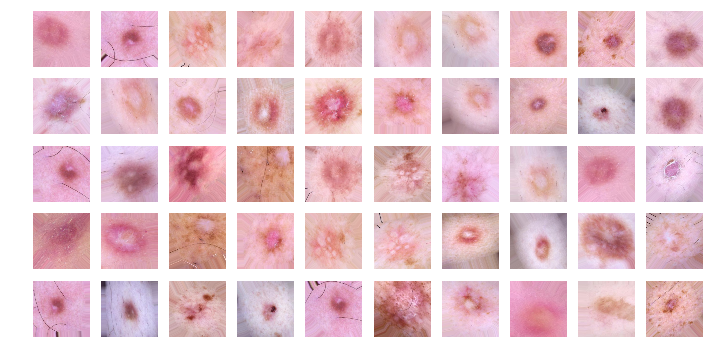

In [100]:
# plots images with labels within jupyter notebook
# source: https://github.com/smileservices/keras_utils/blob/master/utils.py

def plots(ims, figsize=(12,6), rows=5, interp=False, titles=None): # 12,6
    if type(ims[0]) is np.ndarray:
        ims = np.array(ims).astype(np.uint8)
        if (ims.shape[-1] != 3):
            ims = ims.transpose((0,2,3,1))
    f = plt.figure(figsize=figsize)
    cols = len(ims)//rows if len(ims) % 2 == 0 else len(ims)//rows + 1
    for i in range(len(ims)):
        sp = f.add_subplot(rows, cols, i+1)
        sp.axis('Off')
        if titles is not None:
            sp.set_title(titles[i], fontsize=16)
        plt.imshow(ims[i], interpolation=None if interp else 'none')
        
plots(imgs, titles=None) # titles=labels will display the image labels

# Step 7 : Model Building

In [101]:
# Set Up the Generators
train_path = 'base_dir/train_dir'
valid_path = 'base_dir/val_dir'

num_train_samples = len(df_train)
num_val_samples = len(df_val)
train_batch_size = 10
val_batch_size = 10
image_size = 224

train_steps = np.ceil(num_train_samples / train_batch_size)
val_steps = np.ceil(num_val_samples / val_batch_size)


In [102]:
datagen = ImageDataGenerator(
    preprocessing_function= \
    tensorflow.keras.applications.mobilenet.preprocess_input)

train_batches = datagen.flow_from_directory(train_path,
                                            target_size=(image_size,image_size),
                                            batch_size=train_batch_size)

valid_batches = datagen.flow_from_directory(valid_path,
                                            target_size=(image_size,image_size),
                                            batch_size=val_batch_size)

# Note: shuffle=False causes the test dataset to not be shuffled
test_batches = datagen.flow_from_directory(valid_path,
                                            target_size=(image_size,image_size),
                                            batch_size=1,
                                            shuffle=False)


Found 42069 images belonging to 7 classes.
Found 938 images belonging to 7 classes.
Found 938 images belonging to 7 classes.


In [103]:
# create a copy of a mobilenet model

mobile = tensorflow.keras.applications.mobilenet.MobileNet()


In [104]:
mobile.summary()

Model: "mobilenet_1.00_224"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
conv1_pad (ZeroPadding2D)    (None, 225, 225, 3)       0         
_________________________________________________________________
conv1 (Conv2D)               (None, 112, 112, 32)      864       
_________________________________________________________________
conv1_bn (BatchNormalization (None, 112, 112, 32)      128       
_________________________________________________________________
conv1_relu (ReLU)            (None, 112, 112, 32)      0         
_________________________________________________________________
conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)      288       
_________________________________________________________________
conv_dw_1_bn (BatchNormaliza (None, 112, 112, 32

In [105]:
type(mobile.layers)

list

In [106]:
# How many layers does MobileNet have?
len(mobile.layers)



93

In [107]:
# CREATE THE MODEL ARCHITECTURE

# Exclude the last 5 layers of the above model.
# This will include all layers up to and including global_average_pooling2d_1
x = mobile.layers[-6].output

# Create a new dense layer for predictions
# 7 corresponds to the number of classes
x = Dropout(0.25)(x)
predictions = Dense(7, activation='softmax')(x)

# inputs=mobile.input selects the input layer, outputs=predictions refers to the
# dense layer we created above.

model = Model(inputs=mobile.input, outputs=predictions)



In [108]:
model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
conv1_pad (ZeroPadding2D)    (None, 225, 225, 3)       0         
_________________________________________________________________
conv1 (Conv2D)               (None, 112, 112, 32)      864       
_________________________________________________________________
conv1_bn (BatchNormalization (None, 112, 112, 32)      128       
_________________________________________________________________
conv1_relu (ReLU)            (None, 112, 112, 32)      0         
_________________________________________________________________
conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)      288       
_________________________________________________________________
conv_dw_1_bn (BatchNormaliza (None, 112, 112, 32)      128 

In [109]:
# We need to choose how many layers we actually want to be trained.

# Here we are freezing the weights of all layers except the
# last 23 layers in the new model.
# The last 23 layers of the model will be trained.

for layer in model.layers[:-23]:
    layer.trainable = False

# Step 8: Training the model


In [110]:
# Define Top2 and Top3 Accuracy

from tensorflow.keras.metrics import categorical_accuracy, top_k_categorical_accuracy

def top_3_accuracy(y_true, y_pred):
    return top_k_categorical_accuracy(y_true, y_pred, k=3)

def top_2_accuracy(y_true, y_pred):
    return top_k_categorical_accuracy(y_true, y_pred, k=2)

In [111]:
model.compile(Adam(lr=0.01), loss='categorical_crossentropy', 
              metrics=[categorical_accuracy, top_2_accuracy, top_3_accuracy])


In [112]:
# Get the labels that are associated with each index
print(valid_batches.class_indices)

{'akiec': 0, 'bcc': 1, 'bkl': 2, 'df': 3, 'mel': 4, 'nv': 5, 'vasc': 6}


In [113]:
# Add weights to try to make the model more sensitive to melanoma

class_weights={
    0: 1.0, # akiec
    1: 1.0, # bcc
    2: 1.0, # bkl
    3: 1.0, # df
    4: 3.0, # mel # Try to make the model more sensitive to Melanoma.
    5: 1.0, # nv
    6: 1.0, # vasc
}



In [ ]:
filepath = "model.h5"
checkpoint = ModelCheckpoint(filepath, monitor='val_top_3_accuracy', verbose=1, 
                             save_best_only=True, mode='max')

reduce_lr = ReduceLROnPlateau(monitor='val_top_3_accuracy', factor=0.5, patience=2, 
                                   verbose=1, mode='max', min_lr=0.00001)
                              
                              
callbacks_list = [checkpoint, reduce_lr]

history = model.fit_generator(train_batches, steps_per_epoch=train_steps, 
                              class_weight=class_weights,
                    validation_data=valid_batches,
                    validation_steps=val_steps,
                    epochs=30, verbose=1,
                   callbacks=callbacks_list)


Epoch 1/30
907/908 [============================>.] - ETA: 0s - loss: 3.2876 - categorical_accuracy: 0.4206 - top_2_accuracy: 0.6240 - top_3_accuracy: 0.7588
Epoch 00001: val_top_3_accuracy improved from -inf to 0.91471, saving model to model.h5
908/908 [==============================] - 183s 202ms/step - loss: 3.2854 - categorical_accuracy: 0.4208 - top_2_accuracy: 0.6241 - top_3_accuracy: 0.7588 - val_loss: 0.8454 - val_categorical_accuracy: 0.8070 - val_top_2_accuracy: 0.8625 - val_top_3_accuracy: 0.9147
Epoch 2/30
907/908 [============================>.] - ETA: 0s - loss: 1.2985 - categorical_accuracy: 0.5920 - top_2_accuracy: 0.7905 - top_3_accuracy: 0.8951
Epoch 00002: val_top_3_accuracy did not improve from 0.91471
908/908 [==============================] - 182s 201ms/step - loss: 1.2992 - categorical_accuracy: 0.5921 - top_2_accuracy: 0.7904 - top_3_accuracy: 0.8950 - val_loss: 1.2026 - val_categorical_accuracy: 0.6567 - val_top_2_accuracy: 0.7836 - val_top_3_accuracy: 0.8806
E

# Step 9: Model Evaluation

In [ ]:
# get the metric names so we can use evaulate_generator
model.metrics_names


In [ ]:
# Here the the last epoch will be used.

val_loss, val_cat_acc, val_top_2_acc, val_top_3_acc = \
model.evaluate_generator(test_batches, 
                        steps=len(df_val))

print('val_loss:', val_loss)
print('val_cat_acc:', val_cat_acc)
print('val_top_2_acc:', val_top_2_acc)
print('val_top_3_acc:', val_top_3_acc)

In [ ]:
# Here the best epoch will be used.

model.load_weights('model.h5')

val_loss, val_cat_acc, val_top_2_acc, val_top_3_acc = \
model.evaluate_generator(test_batches, 
                        steps=len(df_val))

print('val_loss:', val_loss)
print('val_cat_acc:', val_cat_acc)
print('val_top_2_acc:', val_top_2_acc)
print('val_top_3_acc:', val_top_3_acc)


In [ ]:
# display the loss and accuracy curves

import matplotlib.pyplot as plt

acc = history.history['categorical_accuracy']
val_acc = history.history['val_categorical_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
train_top2_acc = history.history['top_2_accuracy']
val_top2_acc = history.history['val_top_2_accuracy']
train_top3_acc = history.history['top_3_accuracy']
val_top3_acc = history.history['val_top_3_accuracy']
epochs = range(1, len(acc) + 1)

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.figure()

plt.plot(epochs, acc, 'bo', label='Training cat acc')
plt.plot(epochs, val_acc, 'b', label='Validation cat acc')
plt.title('Training and validation cat accuracy')
plt.legend()
plt.figure()



plt.plot(epochs, train_top2_acc, 'bo', label='Training top2 acc')
plt.plot(epochs, val_top2_acc, 'b', label='Validation top2 acc')
plt.title('Training and validation top2 accuracy')
plt.legend()
plt.figure()


plt.plot(epochs, train_top3_acc, 'bo', label='Training top3 acc')
plt.plot(epochs, val_top3_acc, 'b', label='Validation top3 acc')
plt.title('Training and validation top3 accuracy')
plt.legend()



plt.show()

In [ ]:
test_labels = test_batches.classes

In [ ]:
# We need these to plot the confusion matrix.
test_labels



In [ ]:
# Print the label associated with each class
test_batches.class_indices


In [ ]:
# make a prediction
predictions = model.predict_generator(test_batches, steps=len(df_val), verbose=1)



In [ ]:
predictions.shape

In [ ]:
# Source: Scikit Learn website
# http://scikit-learn.org/stable/auto_examples/
# model_selection/plot_confusion_matrix.html#sphx-glr-auto-examples-model-
# selection-plot-confusion-matrix-py


def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

In [ ]:
test_labels.shape

In [ ]:
# argmax returns the index of the max value in a row
cm = confusion_matrix(test_labels, predictions.argmax(axis=1))



In [ ]:
test_batches.class_indices

In [ ]:
# Define the labels of the class indices. These need to match the 
# order shown above.
cm_plot_labels = ['akiec', 'bcc', 'bkl', 'df', 'mel','nv', 'vasc']

plot_confusion_matrix(cm, cm_plot_labels, title='Confusion Matrix')

In [ ]:


# Get the index of the class with the highest probability score
y_pred = np.argmax(predictions, axis=1)

# Get the labels of the test images.
y_true = test_batches.classes



In [ ]:
from sklearn.metrics import classification_report

# Generate a classification report
report = classification_report(y_true, y_pred, target_names=cm_plot_labels)

print(report)